In [6]:
import pandas as pd

In [7]:
data=pd.read_csv("tripadvisor_hotel_reviews.csv")
data=data.head(10)
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
5,love monaco staff husband stayed hotel crazy w...,5
6,"cozy stay rainy city, husband spent 7 nights m...",5
7,"excellent staff, housekeeping quality hotel ch...",4
8,"hotel stayed hotel monaco cruise, rooms genero...",5
9,excellent stayed hotel monaco past w/e delight...,5


In [9]:
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

key="b3ae9e86477d433b83a8ba9f1b1b381b"
endpoint="https://textanaly1.cognitiveservices.azure.com/"

In [10]:
client=TextAnalyticsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential(key)
)

In [11]:
def Analyse_Summary(summary):
    summary_sentiment=client.analyze_sentiment(summary)
    sent_res=[]
    for i in summary_sentiment:
        sent_res.append(i.sentiment)
    return sent_res

In [13]:
print(data.columns)

Index(['Review', 'Rating'], dtype='object')


In [14]:
lis=list(data['Review'])

In [15]:
print(lis)

['nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  ', 'ok nothing special charge diamond member hilton decided chain shot 20th anniversary seattle, start booked suite paid extra website description not, suite bedroom bathroom standard hotel room, took printed reservation desk showed said things like tv couch ect desk clerk told oh mixed suites description kimpton website sorry free breakfast, got kidding, embassy suits sitting room bathroom bedroom unl

In [16]:
sentiment=Analyse_Summary(lis)
print(sentiment)

['positive', 'negative', 'mixed', 'positive', 'positive', 'mixed', 'positive', 'positive', 'neutral', 'positive']


In [17]:
def key_phrase(Text):
    key_res=[]
    summary_keyphrase=client.extract_key_phrases(Text)
    for i in summary_keyphrase:
        key_res.append(i.key_phrases)
    return key_res

In [21]:
lis1=data['Review'].to_list()

In [22]:
print(key_phrase(lis1))

[['good deal stay hotel anniversary', 'stiff neck high pillows', 'nice hotel expensive parking', 'aveda bath products', 'walking distance shopping', 'nice size', 'nice touch', 'nice experience', '40 parking night', 'previous reviews', 'music room', 'bangs doors', 'noisy neighbors', 'advice', 'disappointed', 'bed', 'people', 'hallway', 'goldfish', 'advantage', 'location', 'overall'], ['4 start hotel clean business hotel super high rates', 'hard copy reservation printout website desk manager', 'suite bedroom bathroom standard hotel room', 'special charge diamond member hilton', 'tv couch ect desk clerk', 'housekeeping staff cleaner room property', 'cell phone help bags', 'light sensitive tape controls', 'great room view alley', 'email trip guest survey', 'website reservation description', 'morning shopping room', 'extra website description', 'strawberries room arrival', '20th anniversary seattle', 'mixed suites description', 'correct false advertising', '20th anniversary half', 'good ac-

In [23]:
def entities(Text):
    entities=[]
    ent_res=client.recognize_entities(Text[0:5])
    for i in ent_res:
        entities.append([(entity.text, entity.category, entity.subcategory) for entity in i.entities])
    return entities
        

In [24]:
for i in entities(lis1):
    print(i)

[('late evening', 'DateTime', 'TimeRange'), ('bed', 'Product', None), ('pillows', 'Product', None), ('night', 'DateTime', 'TimeRange'), ('morning', 'DateTime', 'TimeRange'), ('neighbors', 'PersonType', None), ('products', 'Product', None), ('40', 'Quantity', 'Number'), ('night', 'DateTime', 'TimeRange')]
[('member', 'PersonType', None), ('hilton', 'Person', None), ('20th anniversary', 'Event', None), ('seattle', 'Location', 'City'), ('reservation', 'Skill', None), ('desk clerk', 'PersonType', None), ('5 day', 'DateTime', 'Duration'), ('reservation', 'Skill', None), ('desk manager', 'PersonType', None), ('guest', 'Skill', None), ('guest', 'PersonType', None), ('staff', 'PersonType', None), ('1/2', 'Quantity', 'Number'), ('11 pm', 'DateTime', 'Time'), ('cell phone help bags', 'Product', None), ('20th', 'Quantity', 'Ordinal'), ('half', 'Quantity', 'Number'), ('bottle', 'Product', None), ('champagne chocolate covered strawberries', 'Product', None), ('room', 'Location', 'Structural'), ('ar

In [25]:
import matplotlib.pyplot as plt

(array([7., 3.]), array([0. , 1.5, 3. ]), <BarContainer object of 2 artists>)

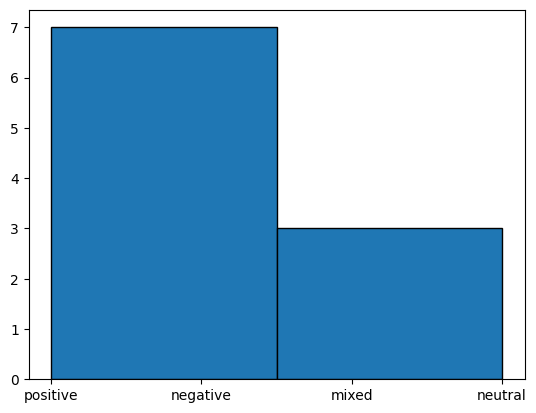

In [26]:
plt.hist(sentiment,bins=2,edgecolor='black')

In [3]:
import os
SPEECH_KEY = os.getenv("SPEECH_KEY", "c721a4fe4cc2457583f177564fbf697e")
SPEECH_REGION = "eastus"

In [4]:
def text_to_speech(text, language):
    global speech_synthesizer
    try:
        speech_config = speechsdk.SpeechConfig(subscription=SPEECH_KEY, region=SPEECH_REGION)
        speech_config.speech_synthesis_voice_name = LANGUAGE_OPTIONS[language][1]
        speech_synthesizer = speechsdk.SpeechSynthesizer(speech_config=speech_config)
        
        # Mark that speech is ongoing
        st.session_state.speech_ongoing = True

        # Use a placeholder for dynamic content
        status_placeholder = st.empty()

        def speech_synthesis_callback(evt):
            if evt.result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
                status_placeholder.success("Speech synthesis completed successfully.")
                st.session_state.speech_ongoing = False
            elif evt.result.reason == speechsdk.ResultReason.Canceled:
                status_placeholder.error(f"Speech synthesis canceled: {evt.result.cancellation_details.reason}")
                st.session_state.speech_ongoing = False

        speech_synthesizer.synthesizing.connect(lambda evt: status_placeholder.info("Synthesizing speech..."))
        speech_synthesizer.synthesis_completed.connect(speech_synthesis_callback)
        speech_synthesizer.synthesis_canceled.connect(speech_synthesis_callback)

        # Start the speech synthesis
        result = speech_synthesizer.speak_text_async(text).get()
        
        if result.reason == speechsdk.ResultReason.SynthesizingAudioCompleted:
            status_placeholder.success("Speech synthesis completed successfully.")
        elif result.reason == speechsdk.ResultReason.Canceled:
            status_placeholder.error(f"Speech synthesis canceled: {result.cancellation_details.reason}")
        
        st.session_state.speech_ongoing = False

    except Exception as e:
        st.error(f"Error in speech synthesis: {e}")
        st.session_state.speech_ongoing = False


In [5]:
# Stop Speech
def stop_speech():
    global speech_synthesizer
    if speech_synthesizer:
        speech_synthesizer.stop_speaking_async()
        st.session_state.speech_ongoing = False
        st.success("Speech synthesis stopped.")